## 檢查雙因子搭配不同策略，其單一組合的收益穩定度、獲利分布圖


##### 實驗日期: 2024/05/05


In [1]:
# # 添加iplab模組
# import sys
# sys.path.append('../../iplab/')
# sys.path.append('../../iplab/core')
import sys
sys.path.insert(0, 'C:/Users/user/iplab/stock_factor_lab')

In [2]:
from database import Database
from get_data import Data
import backtest
from combinations import sim_conditions
import pandas as pd
import numpy as np
from factor_analysis import *

### 1 檢視組合: EV_EBITDA(2) + PB(8) 加權排名法


#### 1-1 準備因子資料並執行回測


##### 可根據使用者需求調整參數


In [3]:
data=Data()

In [4]:
# 預先準備好需要的因子資料
all_factor_df_dict = {
    'pb': data.get("report: pb"),
    'ev_ebitda': data.get("report: ev_ebitda"),
 }

In [5]:
# 決定因子排序的方向
factor_asc_dict = {
    'pb': True,
    'ev_ebitda': True
}
# 決定雙因子比重
factor_ratio_dict = {
    'pb': 0.8,
    'ev_ebitda': 0.2
}
# 決定因子切割的等份
quantile = 10

# 決定加權內插or排名法
method = 'ranked'

In [6]:
# 將上述的因子根據quantile切割成相對應的大小，回傳dict
all_quantile = cal_factor_sum_df_interpolated(['pb', 'ev_ebitda'], factor_ratio_dict, factor_asc_dict, quantile, method, all_factor_df_dict)

In [7]:
# 根據實驗需求，僅需擷取Q1
quantile_1 = all_quantile['Quantile_1']

In [8]:
# quantile_1.index = pd.to_datetime(quantile_1.index)

In [9]:
# 因為06年之前的財報資料缺漏很多，所以從06年開始切割
quantile_1 = quantile_1.loc['2006-03-31':'2023-12-31']

In [10]:
# 可以看一下內容
quantile_1

company_symbol,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
2006-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2006-05-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2006-08-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2006-11-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2007-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2022-11-15,False,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-03-31,False,False,True,True,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2023-08-31,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# 呼叫回測API
report_M = backtest.sim(quantile_1, resample="M",data=data)

#### 1-2 檢視該雙因子組合的細部績效


In [12]:
stock_data = report_M.stock_data

In [13]:
stock_data

,portfolio_returns,cum_returns,company_count
date,,,
2006-03-31,100.000000,1.000000,161.0
2006-04-03,99.857500,0.998575,NaN
2006-04-04,99.852281,0.998523,NaN
2006-04-06,99.888636,0.998886,NaN
2006-04-07,99.919388,0.999194,NaN
...,...,...,...
2023-12-25,1156.272651,11.562727,NaN
2023-12-26,1158.685113,11.586851,NaN
2023-12-27,1166.205594,11.662056,NaN


In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設置中文字體
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # 手動設置負號符號

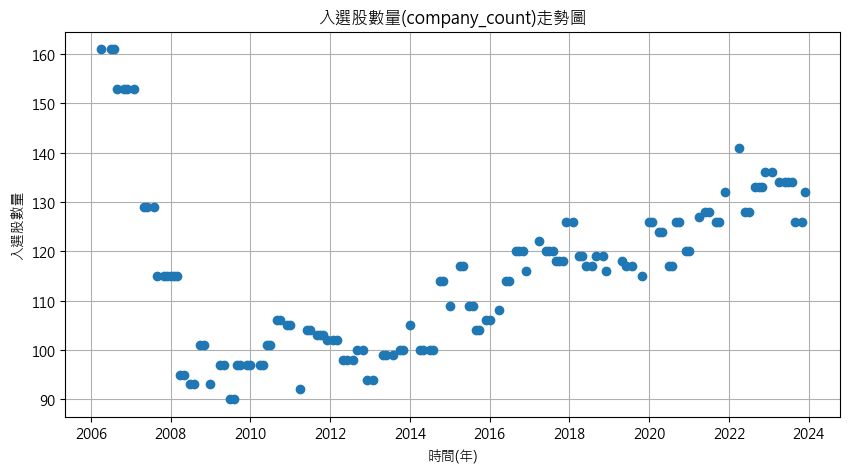

In [15]:
# 使用 matplotlib 繪圖
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['company_count'], marker='o', linestyle='-', linewidth=1)  # 'o' 是點樣式, '-' 是線樣式
plt.title('入選股數量(company_count)走勢圖')
plt.xlabel('時間(年)')
plt.ylabel('入選股數量')
plt.grid(True)
plt.show()

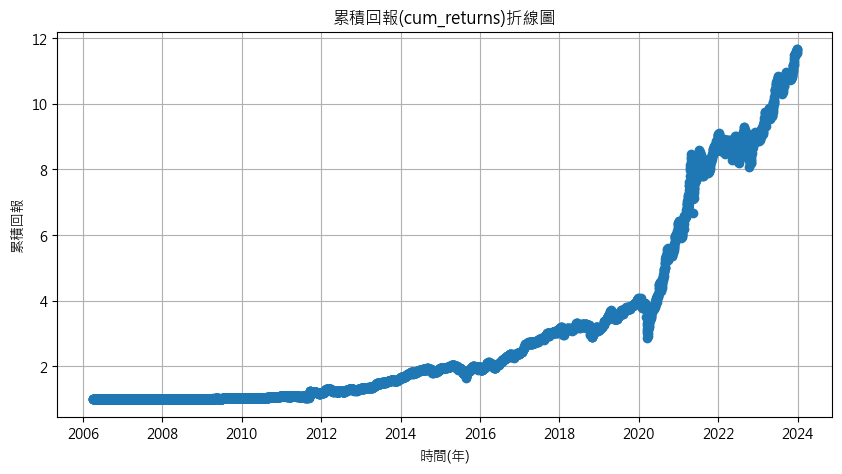

In [16]:
# 使用 matplotlib 繪圖
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['cum_returns'], marker='o', linestyle='-', linewidth=1)  # 'o' 是點樣式, '-' 是線樣式
plt.title('累積回報(cum_returns)折線圖')
plt.xlabel('時間(年)')
plt.ylabel('累積回報')
plt.grid(True)
plt.show()

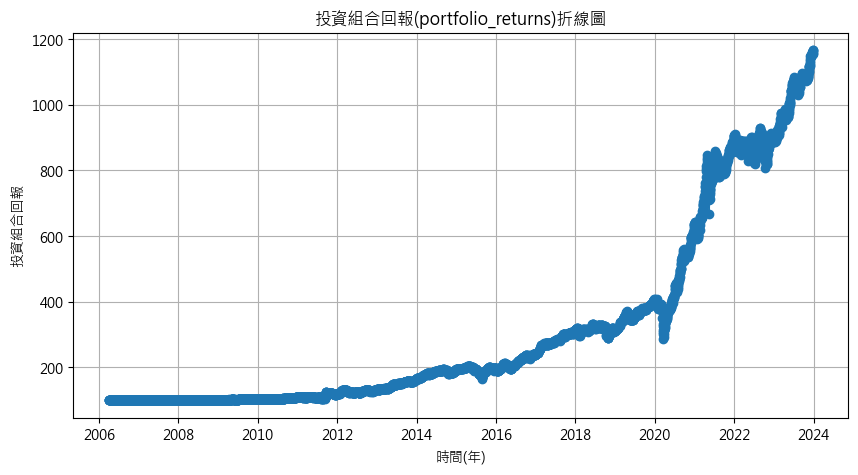

In [17]:
# 使用 matplotlib 繪圖
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['portfolio_returns'], marker='o', linestyle='-', linewidth=1)  # 'o' 是點樣式, '-' 是線樣式
plt.title('投資組合回報(portfolio_returns)折線圖')
plt.xlabel('時間(年)')
plt.ylabel('投資組合回報')
plt.grid(True)
plt.show()

In [18]:
report_M.stock_data['company_count'].mean()
 

114.96268656716418

In [19]:
report_M.stock_data['company_count'].median()
 

115.0

In [20]:
report_M.display()

,annualized_rate_of_return,sharpe,max_drawdown,win_ratio
,14.85%,17.32,-30.28%,54.96%


,entry_date,exit_date,entry_sig_date,exit_sig_date,position,period,entry_index,exit_index,return,mae,gmfe,bmfe,mdd,pdays,weight,next_weights
stock_id,,,,,,,,,,,,,,,,
1213,2023-09-01,2023-12-01,2023-08-31,2023-11-30,0.007937,62,5860,5922,0.067321,-0.014634,0.186992,0.000000,-0.106849,61.0,0.000000,0.000000
1339,2023-09-01,2023-12-01,2023-08-31,2023-11-30,0.007937,62,5860,5922,0.393518,-0.076923,0.399368,0.004215,-0.080797,57.0,0.000000,0.000000
1589,2023-09-01,2023-12-01,2023-08-31,2023-11-30,0.007937,62,5860,5922,-0.085560,-0.115942,0.014493,0.014493,-0.128571,7.0,0.000000,0.000000
1595,2021-06-01,2023-12-01,2021-05-31,2023-11-30,0.007812,613,5309,5922,0.061283,-0.022378,0.202797,0.016783,-0.137209,324.0,0.000000,0.000000
1906,2023-09-01,2023-12-01,2023-08-31,2023-11-30,0.007937,62,5860,5922,-0.015465,-0.067308,0.003205,0.003205,-0.070288,3.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911868,2017-09-01,NaT,2017-08-31,NaT,0.008475,1547,4396,-1,-0.187058,-0.436242,2.174497,0.194631,-0.767442,357.0,0.007576,0.007576
912000,2022-04-01,NaT,2022-03-31,NaT,0.007092,429,5514,-1,-0.130850,-0.226563,0.007812,0.000000,-0.226563,1.0,0.007576,0.007576
9136,2016-04-01,NaT,2016-03-31,NaT,0.009259,1896,4047,-1,-0.471755,-0.633263,0.331752,0.009204,-0.658089,14.0,0.007576,0.007576


In [21]:
# MDD
tmp = report_M.calc_dd(report_M.stock_data['portfolio_returns'])*100
tmp

date
2006-03-31    0.000000
2006-04-03   -0.142500
2006-04-04   -0.147719
2006-04-06   -0.111364
2006-04-07   -0.080612
                ...   
2023-12-25   -0.390182
2023-12-26   -0.182355
2023-12-27    0.000000
2023-12-28   -0.191491
2023-12-29    0.000000
Name: portfolio_returns, Length: 4377, dtype: float64

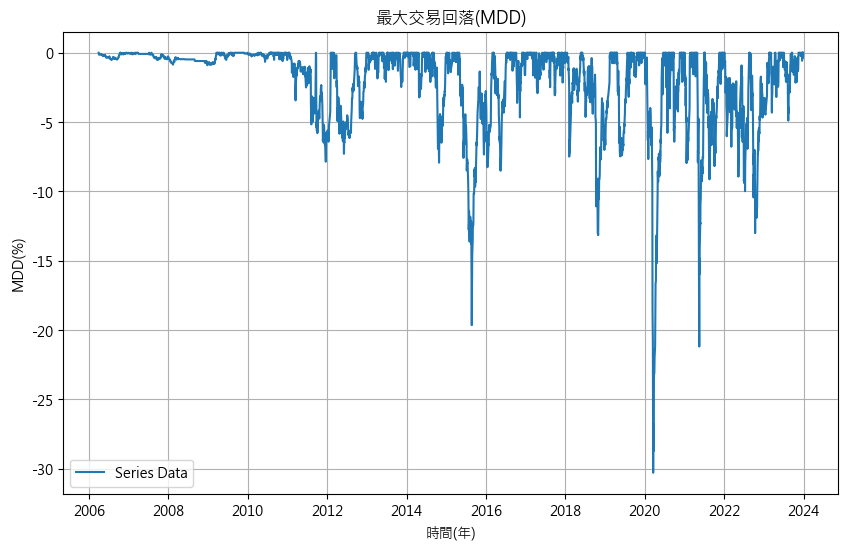

In [22]:
import matplotlib.pyplot as plt

# Plot using Matplotlib directly
plt.figure(figsize=(10, 6))
plt.plot(tmp.index, tmp.values, label='Series Data')
plt.title('最大交易回落(MDD)')
plt.xlabel('時間(年)')

# Add '%' to label with string formatting
plt.ylabel('MDD(%)')  # Add '%' to the label

plt.grid(True)
plt.legend()
plt.show()

In [23]:
report_M.display_reutrn_treemap()

In [24]:
report_M.display_topN_cum_return_yearly()

In [25]:
# 檢視每個股票的詳細交易紀錄
report_M.trades

,stock_id,entry_date,exit_date,entry_sig_date,exit_sig_date,position,period,return,mae,gmfe,bmfe,mdd,pdays
trade_index,,,,,,,,,,,,,
0,3176,2006-04-03,2006-09-01,2006-03-31,2006-08-31,0.006211,106,-0.005850,0.000000,0.000000,0.000000,0.000000,0.0
1,3484,2006-04-03,2006-09-01,2006-03-31,2006-08-31,0.006211,106,-0.005850,0.000000,0.000000,0.000000,0.000000,0.0
2,3490,2006-04-03,2006-09-01,2006-03-31,2006-08-31,0.006211,106,-0.005850,0.000000,0.000000,0.000000,0.000000,0.0
3,3494,2006-04-03,2006-09-01,2006-03-31,2006-08-31,0.006211,106,-0.005850,0.000000,0.000000,0.000000,0.000000,0.0
4,3498,2006-04-03,2006-09-01,2006-03-31,2006-08-31,0.006211,106,-0.005850,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,911868,2017-09-01,NaT,2017-08-31,NaT,0.008475,1547,-0.187058,-0.436242,2.174497,0.194631,-0.767442,357.0
2184,912000,2022-04-01,NaT,2022-03-31,NaT,0.007092,429,-0.130850,-0.226563,0.007812,0.000000,-0.226563,1.0
2185,9136,2016-04-01,NaT,2016-03-31,NaT,0.009259,1896,-0.471755,-0.633263,0.331752,0.009204,-0.658089,14.0


In [26]:
import pandas as pd
import plotly.graph_objects as go


trades_df = report_M.trades
trades_df["cum_return"] =  (1 + trades_df['return']).groupby(trades_df['stock_id']).cumprod() - 1
trades_df = trades_df.groupby('stock_id').last()
trades_df = trades_df.reset_index()

# 假設您有一個 DataFrame，命名為 df，其中包含每次交易的股票、收益等信息

# 設定 entry_date 的型態為 datetime
trades_df['entry_date'] = pd.to_datetime(trades_df['entry_date'])

# 提取年份資訊
trades_df['year'] = trades_df['entry_date'].dt.year
topN = 5
grouped = trades_df.groupby(['year', 'stock_id'])['cum_return'].last().reset_index()


# 假设 trades_df 已经包含 'year', 'stock_id', 和 'cum_return'
# 先按照股票和年份分组计算每年每只股票的累积回报
topN = 5
grouped = trades_df.groupby(['year', 'stock_id'])['cum_return'].last().reset_index()

# 对每年的数据进行处理，选择前N只和其他股票的总和
def process_year_group(group):
    top_stocks = group.nlargest(topN, 'cum_return')
    # 计算其他股票的总和
    other_total = group[~group['stock_id'].isin(top_stocks['stock_id'])]['cum_return'].sum()
    # 将其他股票的总和作为一行添加进来
    other_row = pd.DataFrame({'year': [group['year'].iloc[0]],
                              'stock_id': ['其他'],
                              'cum_return': [other_total]})
    return pd.concat([top_stocks, other_row], ignore_index=True)

# 应用上述函数
final_data = grouped.groupby('year').apply(process_year_group).reset_index(drop=True)
fig = go.Figure()

# 首先添加“其他”类别的条形图追踪
other_data = final_data[final_data['stock_id'] == '其他']
if not other_data.empty:
    fig.add_trace(go.Bar(
        x=other_data['year'],
        y=other_data['cum_return'],
        name='其他',
        marker=dict(
            color='white',  # 设置填充颜色为白色
            pattern_shape="/"  # 设置填充图案为斜线
        )
    ))

# 然后添加其他股票的追踪
for stock_id in final_data['stock_id'].unique():
    if stock_id != '其他':
        stock_data = final_data[final_data['stock_id'] == stock_id]
        fig.add_trace(go.Bar(
            x=stock_data['year'],
            y=stock_data['cum_return'],
            name=f'Stock {stock_id}'
        ))

fig.update_layout(
    barmode='stack',
    title='年度前五高報酬所佔全部比例',
    xaxis=dict(title='年份'),
    yaxis=dict(title='累積回報'),
    legend_title="公司代號"
)

fig.show()

In [27]:
report_M.get_stats()


{'CAGR': 0.14845288861240835,
 'daily_sharpe': 17.32,
 'max_drawdown': -0.302808505403811,
 'avg_drawdown': -0.020151720988234263,
 'win_ratio': 0.5496108949416343,
 'ytd': 0.3103859998047802}

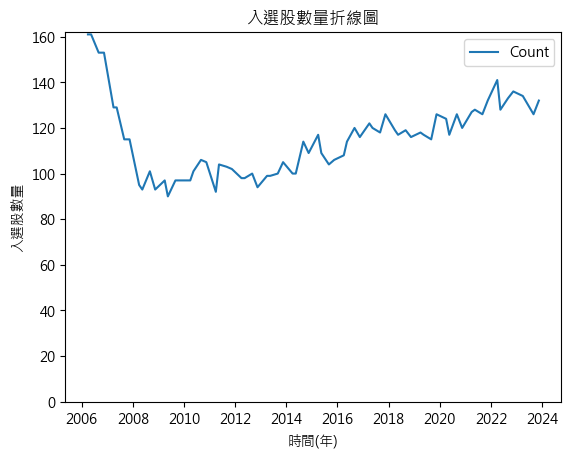

In [28]:
# 顯示每一天的入選數量
true_counts = quantile_1.sum(axis=1)
# 使用 matplotlib 繪製折線圖
plt.plot(true_counts.index, true_counts.values, label='Count')

# 添加標籤和標題
plt.xlabel('時間(年)')
plt.ylabel('入選股數量')
plt.title('入選股數量折線圖')

# 添加圖例
plt.legend()
# 調整 Y 軸的尺度（範圍）
plt.ylim(bottom=0, top=max(true_counts) + 1)  # 替換成您希望的範圍
# 顯示圖形
plt.show()